        lastSensorEventHours
0                       10.0
1                       10.0
2                       10.0
3                       10.0
4                       10.0
...                      ...
321423                  23.0
321424                  23.0
321425                  23.0
321426                  23.0
321427                  23.0

[321428 rows x 1 columns]
Значения Nan по всем столбцам 0
Size of data 321428
Shape of the data (321428, 1)
0.0     13982
1.0      3459
2.0      1414
3.0      1521
4.0      2212
5.0      2027
6.0      6748
7.0     16084
8.0     24149
9.0     27264
10.0    28358
11.0    30715
12.0    23738
13.0    16297
14.0    13980
15.0    12248
16.0    10600
17.0    13789
18.0    11086
19.0    10918
20.0    10080
21.0    16423
22.0     8889
23.0    15447
Name: lastSensorEventHours, dtype: int64
Количество уникальных значений в столбце 24
Вывод уникальных значений [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
For no of

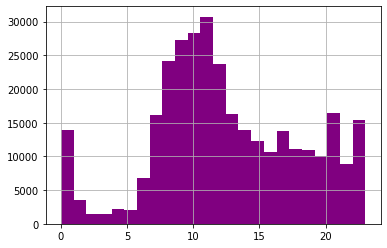

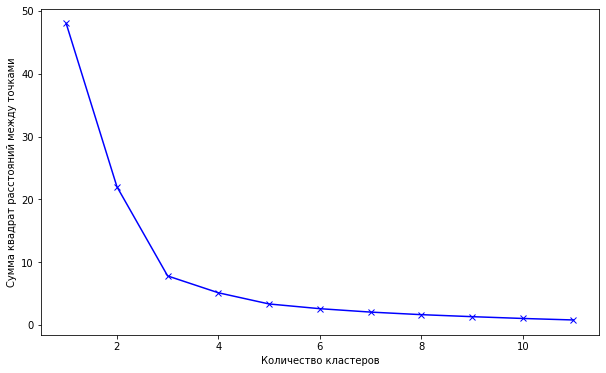

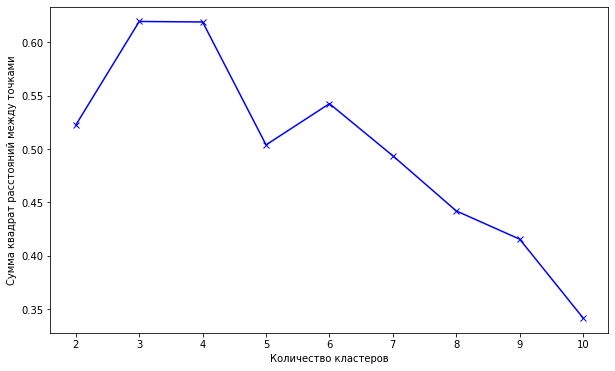

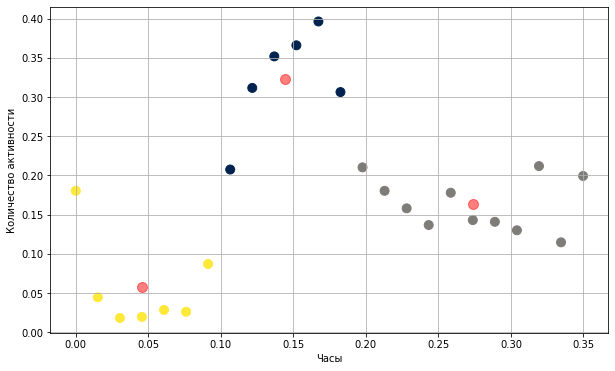

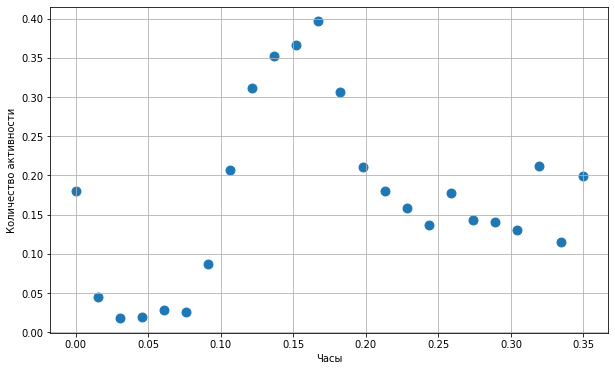

Время, затраченное на выполнение кода на 32 ядрах =  2.1657145023345947


In [84]:
import time
from matplotlib import pyplot as plt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics


from sklearn.metrics import silhouette_score

startTime  = time.time() 


#загрузка данных
dataframe = pd.read_csv("csh101.ann.features.csv")
Last_senor_and_time_Since = dataframe[["lastSensorEventHours"]]

print (Last_senor_and_time_Since) #вывод данных

print('Значения Nan по всем столбцам',dataframe.isnull().sum().sum()) #нет Nan значений 

#анализ элементов данных
print ('Size of data', Last_senor_and_time_Since.size)
print ('Shape of the data', Last_senor_and_time_Since.shape)

#Подсчет активности датчиков в часы и сортировка их по алфавиту
res = Last_senor_and_time_Since ['lastSensorEventHours'].value_counts().sort_index(ascending=True) #ascending=True
print (res)
# Количество уникальных значений в столбце
print('Количество уникальных значений в столбце',Last_senor_and_time_Since.lastSensorEventHours.nunique(dropna = True))



# Создадим индексы для уникальных значений согласно таблице
Index_prom = [i for i in range(Last_senor_and_time_Since.lastSensorEventHours.nunique(dropna = True))]
print ('Вывод уникальных значений',Index_prom)

# гистограмма активности и датчиков и часов
Last_senor_and_time_Since ['lastSensorEventHours'].hist(bins=24, color='purple')


#проверка исходных данных
#проверка на нули нет библиотеки seaborn

#Нормализация данных
index_array = np.array(Index_prom)
normalized_Index = preprocessing.normalize([index_array]) #нормализовали индексы
kolvo_array = np.array(res)
normalized_kolvo = preprocessing.normalize([kolvo_array]) #нормализовали количество



data_clust = pd.DataFrame() 
data_clust['Index']=normalized_Index[0,:]
data_clust['Amount of activity']=normalized_kolvo[0,:]
#data_clust['Index']=Index_prom 
#data_clust['Hours']=res
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clust)
hours_activity = pd.DataFrame(data_scaled)
wcss = []
X = hours_activity
#Метод локтя
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (10,6))
plt.plot(range(1, 12), wcss,'bx-' )
plt.xlabel('Количество кластеров')
plt.ylabel('Cумма квадрат расстояний между точками')

#Оптимально 3 кластера Метод силуэта это доказал


#метод силуэтов  Среднее расстояние между наблюдением и всеми другими точками данных в том же кластере. 
#Это расстояние также можно назвать средним внутрикластерным расстоянием. Среднее расстояние обозначается
#Среднее расстояние между наблюдением и всеми другими точками данных следующего ближайшего кластера. 
#Это расстояние также можно назвать средним расстоянием ближайшего кластера. Среднее расстояние обозначается b
wcss_2 = []
for i in range(2, 11):
    cluster = KMeans(n_clusters =i)
    cluster_labels = cluster.fit_predict(X)
    # Silhouette_score дает среднее значение для всех образцов.
    silhouette_avg = silhouette_score(X, cluster_labels)
    wcss_2.append( silhouette_score(X, cluster_labels))
    print("For no of clusters =", i," The average silhouette_score is :", silhouette_avg)
plt.figure(figsize = (10,6))
plt.plot(range(2, 11), wcss_2,'bx-' )
plt.xlabel('Количество кластеров')
plt.ylabel('Cумма квадрат расстояний между точками')



#Постройка графика с кластерами
fig, ax1 = plt.subplots(figsize=(10, 6)) 
XX= np.column_stack([normalized_Index[0,:],normalized_kolvo[0,:]])    
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(XX)
kmeans.fit(XX)
y_kmeans = kmeans.predict(XX) #здесь формируются номера для цветов
ax1.scatter(normalized_Index[0,:],normalized_kolvo[0,:] ,marker='o', c=y_kmeans, s=80,  cmap='cividis') #cmap='viridis'
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);
ax1.grid()
ax1.set_xlabel('Часы')
ax1.set_ylabel('Количество активности')

#Постройка графика без кластеров
fig, ax2 = plt.subplots(figsize=(10, 6)) 
ax2.scatter(normalized_Index[0,:],normalized_kolvo[0,:] ,marker='o', s=80,  cmap='cividis') #cmap='viridis'
ax2.grid()
ax2.set_xlabel('Часы')
ax2.set_ylabel('Количество активности')

plt.show()

endTime = time.time() 
totalTime = endTime - startTime 
print("Время, затраченное на выполнение кода на 32 ядрах = ", totalTime)


In [48]:
data_clust

,Index,Amount of activity
0,0.000000,0.180399
1,0.015207,0.044629
2,0.030415,0.018244
3,0.045622,0.019624
4,0.060830,0.028540
5,0.076037,0.026153
6,0.091245,0.087064
7,0.106452,0.207519
8,0.121660,0.311576
9,0.136867,0.351766


,lastSensorEventHours
0,10.0
1,10.0
2,10.0
3,10.0
4,10.0
...,...
321423,23.0
321424,23.0
321425,23.0
321426,23.0


In [39]:
#Добавили данные из другого дома
dataframe_2 = pd.read_csv("csh102.ann.features.csv")
Last_senor_and_time_Since_2 = dataframe[["lastSensorEventHours"]]
Last_senor_and_time_Since = Last_senor_and_time_Since.append(Last_senor_and_time_Since_2 , ignore_index=True)


In [40]:
Last_senor_and_time_Since

,lastSensorEventHours
0,10.0
1,10.0
2,10.0
3,10.0
4,10.0
...,...
642851,23.0
642852,23.0
642853,23.0
642854,23.0


        lastSensorEventHours
0                       10.0
1                       10.0
2                       10.0
3                       10.0
4                       10.0
...                      ...
321423                  23.0
321424                  23.0
321425                  23.0
321426                  23.0
321427                  23.0

[321428 rows x 1 columns]
Значения Nan по всем столбцам 0
Size of data 321428
Shape of the data (321428, 1)
0.0     13982
1.0      3459
2.0      1414
3.0      1521
4.0      2212
5.0      2027
6.0      6748
7.0     16084
8.0     24149
9.0     27264
10.0    28358
11.0    30715
12.0    23738
13.0    16297
14.0    13980
15.0    12248
16.0    10600
17.0    13789
18.0    11086
19.0    10918
20.0    10080
21.0    16423
22.0     8889
23.0    15447
Name: lastSensorEventHours, dtype: int64
Количество уникальных значений в столбце 24
Вывод уникальных значений [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
For no of

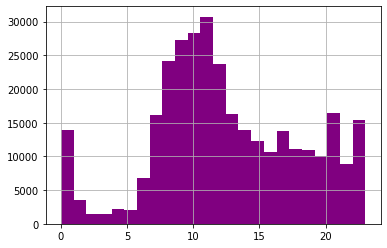

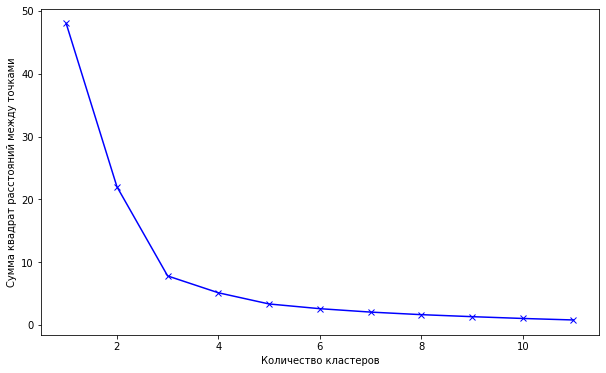

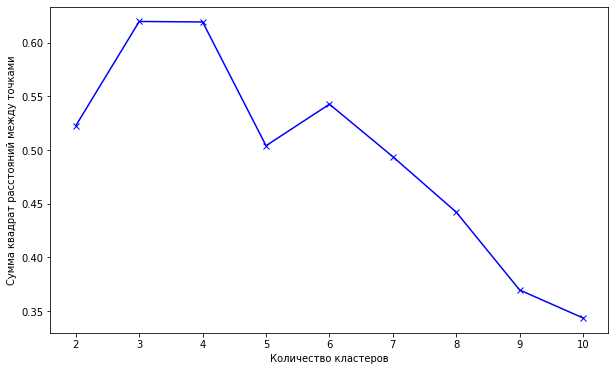

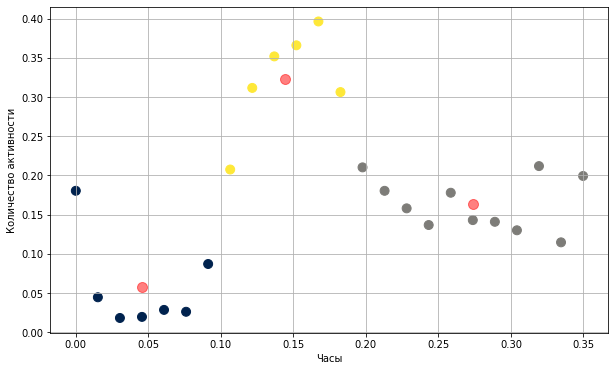

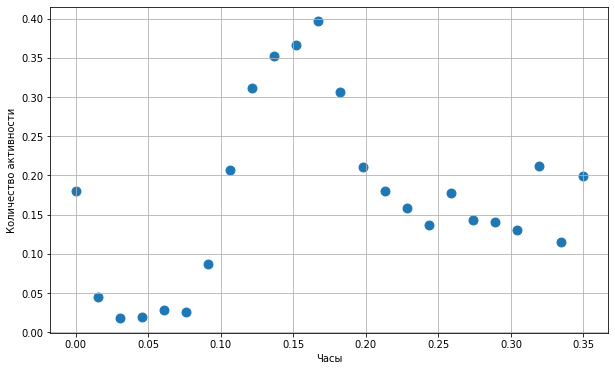

Время, затраченное на выполнение кода на 4 ядрах =  1.1667332649230957


In [83]:
#Анализ после увеличения данных
startTime  = time.time() 
#загрузка данных
print (Last_senor_and_time_Since) #вывод данных
print('Значения Nan по всем столбцам',dataframe.isnull().sum().sum()) #нет Nan значений 
#анализ элементов данных
print ('Size of data', Last_senor_and_time_Since.size)
print ('Shape of the data', Last_senor_and_time_Since.shape)
#Подсчет активности датчиков в часы и сортировка их по алфавиту
res = Last_senor_and_time_Since ['lastSensorEventHours'].value_counts().sort_index(ascending=True) #ascending=True
print (res)
# Количество уникальных значений в столбце
print('Количество уникальных значений в столбце',Last_senor_and_time_Since.lastSensorEventHours.nunique(dropna = True))



# Создадим индексы для уникальных значений согласно таблице
Index_prom = [i for i in range(Last_senor_and_time_Since.lastSensorEventHours.nunique(dropna = True))]
print ('Вывод уникальных значений',Index_prom)

# гистограмма активности и датчиков и часов
Last_senor_and_time_Since ['lastSensorEventHours'].hist(bins=24, color='purple')


#проверка исходных данных
#проверка на нули нет библиотеки seaborn

#Нормализация данных
index_array = np.array(Index_prom)
normalized_Index = preprocessing.normalize([index_array]) #нормализовали индексы
kolvo_array = np.array(res)
normalized_kolvo = preprocessing.normalize([kolvo_array]) #нормализовали количество



data_clust = pd.DataFrame() 
data_clust['Index']=normalized_Index[0,:]
data_clust['Amount of activity']=normalized_kolvo[0,:]
#data_clust['Index']=Index_prom 
#data_clust['Hours']=res
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clust)
hours_activity = pd.DataFrame(data_scaled)
wcss = []
X = hours_activity
#Метод локтя
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (10,6))
plt.plot(range(1, 12), wcss,'bx-' )
plt.xlabel('Количество кластеров')
plt.ylabel('Cумма квадрат расстояний между точками')

#Оптимально 3 кластера Метод силуэта это доказал


#метод силуэтов  Среднее расстояние между наблюдением и всеми другими точками данных в том же кластере. 
#Это расстояние также можно назвать средним внутрикластерным расстоянием. Среднее расстояние обозначается
#Среднее расстояние между наблюдением и всеми другими точками данных следующего ближайшего кластера. 
#Это расстояние также можно назвать средним расстоянием ближайшего кластера. Среднее расстояние обозначается b
wcss_2 = []
for i in range(2, 11):
    cluster = KMeans(n_clusters =i)
    cluster_labels = cluster.fit_predict(X)
    # Silhouette_score дает среднее значение для всех образцов.
    silhouette_avg = silhouette_score(X, cluster_labels)
    wcss_2.append( silhouette_score(X, cluster_labels))
    print("For no of clusters =", i," The average silhouette_score is :", silhouette_avg)
plt.figure(figsize = (10,6))
plt.plot(range(2, 11), wcss_2,'bx-' )
plt.xlabel('Количество кластеров')
plt.ylabel('Cумма квадрат расстояний между точками')



#Постройка графика с кластерами
fig, ax1 = plt.subplots(figsize=(10, 6)) 
XX= np.column_stack([normalized_Index[0,:],normalized_kolvo[0,:]])    
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(XX)
kmeans.fit(XX)
y_kmeans = kmeans.predict(XX) #здесь формируются номера для цветов
ax1.scatter(normalized_Index[0,:],normalized_kolvo[0,:] ,marker='o', c=y_kmeans, s=80,  cmap='cividis') #cmap='viridis'
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);
ax1.grid()
ax1.set_xlabel('Часы')
ax1.set_ylabel('Количество активности')

#Постройка графика без кластеров
fig, ax2 = plt.subplots(figsize=(10, 6)) 
ax2.scatter(normalized_Index[0,:],normalized_kolvo[0,:] ,marker='o', s=80,  cmap='cividis') #cmap='viridis'
ax2.grid()
ax2.set_xlabel('Часы')
ax2.set_ylabel('Количество активности')

plt.show()

endTime = time.time() 
totalTime = endTime - startTime 
print("Время, затраченное на выполнение кода на 4 ядрах = ", totalTime)

In [63]:
#!c1.8
#2.09728336332285
#2.170020580291748
#10.81599974632232
#ДЛя БОЛЬШИХ данных
#Время, затраченное на выполнение кода на 4 ядрах =  14.63089895248413
#Время, затраченное на выполнение кода на 8 ядрах =  16.698128938674927
#Время, затраченное на выполнение кода на 32 ядрах =  16.228428602218628

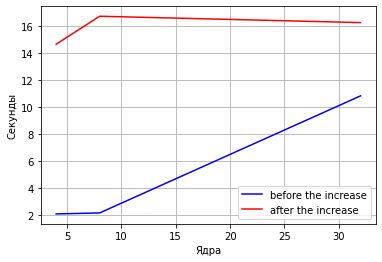

In [79]:
from matplotlib import pyplot as plt   
plt.figsize=(15, 15)
plt.plot([4,8,32],[2.09728336332285,2.170020580291748,10.81599974632232], c='b',label='before the increase')   
plt.plot([4,8,32],[14.63089895248413, 16.698128938674927,16.228428602218628], c='r',label='after the increase')   
plt.legend(loc=4)
plt.grid()
plt.ylabel('Секунды')   
plt.xlabel('Ядра')  
plt.show()   


0     6
1    11
2     7
Name: Klasters, dtype: int64


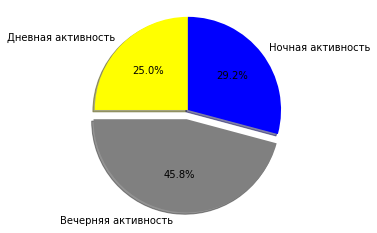

In [93]:
#Круговая диаграмма
#Подсчет активности датчиков в часы и сортировка их по алфавиту
data_clust_f = pd.DataFrame() 
data_clust_f['Klasters']= y_kmeans

For_circle_diag = data_clust_f['Klasters'].value_counts().sort_index(ascending=True) #ascending=True
print (For_circle_diag)
# Количество уникальных значений в столбце


Aus_Players = 'Дневная активность', 'Вечерняя активность', 'Ночная активность'  
colors = ( "yellow", "grey","blue") 
explode =(0, 0.1, 0)  # it "explode" the 1st slice    
   
fig1, ax1 = plt.subplots()   
ax1.pie(For_circle_diag, explode=explode, labels=Aus_Players, autopct='%1.1f%%',   shadow=True, startangle=90,colors = colors)   
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.   
   
plt.show()   
